In [23]:
#importation section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

In [24]:
'''*******************Supervised learning section : Regression*********************
1-in this problem we will try to predict the price of a car based on its features and attributes

'''

'*******************Supervised learning section : Regression*********************\nin this problem we will try to predict the price of a car based on its features and attributes\n\n'

In [32]:
'''
2-import an adequate data for this problem
'''
files = [f for f in listdir("./dataset/") if isfile(join("./dataset/", f))]
dataframes={}
for f in files:
        dataframes[f]=pd.read_csv('./dataset/'+f)



In [34]:
'''
3-cleaning each dataset
'''
def clean(file_name,data):
    n=data.isnull().sum().sum()
    if(n==0):
        print(file_name+" is ready to be used")
    else:
        print("No! there are :",n,"total null values")
    #we check if there are any null values
        for col in data.columns:
        #if a column doesnt have any null values then there is no point processing it
            if(data[col].isnull().sum()>0):
                if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):
                #if our data numerical (is either float or int) 
                    before=data[col].isnull().sum()
                    print(col,"before",data[col].isnull().sum())
                    data[col].fillna(data[col].mean(),inplace=True)
                    print(col,"after",data[col].isnull().sum())
                    if(before!=0 and data[col].isnull().sum()==before):
                        print("dropping ",col)
                        data=data.drop([col], axis=1)
                
                elif (str(data.dtypes[col])=="object"):
                #if our data is categorical (is an object)
                    a=data[col].mode()
                    l=len(a)
                    s=a[l-1]
                    print(s)
                    before=data[col].isnull().sum()
                    print(col,"before",data[col].isnull().sum())
                    data[col].fillna(s,inplace=True)
                    print(col,"after",data[col].isnull().sum())
                    if(before!=0 and data[col].isnull().sum()==before):
                        print("dropping ",col)
                        data=data.drop([col], axis=1)
                
        
    
        print(file_name+" should now be ready to be used.") 
for k,v in dataframes.items():
    clean(k,v)
        
 

audi.csv is ready to be used
bmw.csv is ready to be used
cclass.csv is ready to be used
focus.csv is ready to be used
ford.csv is ready to be used
hyundi.csv is ready to be used
merc.csv is ready to be used
skoda.csv is ready to be used
toyota.csv is ready to be used
vauxhall.csv is ready to be used
vw.csv is ready to be used


In [35]:
#displaying the data : audi
dataframes["audi.csv"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
'''
4-visualisations
'''


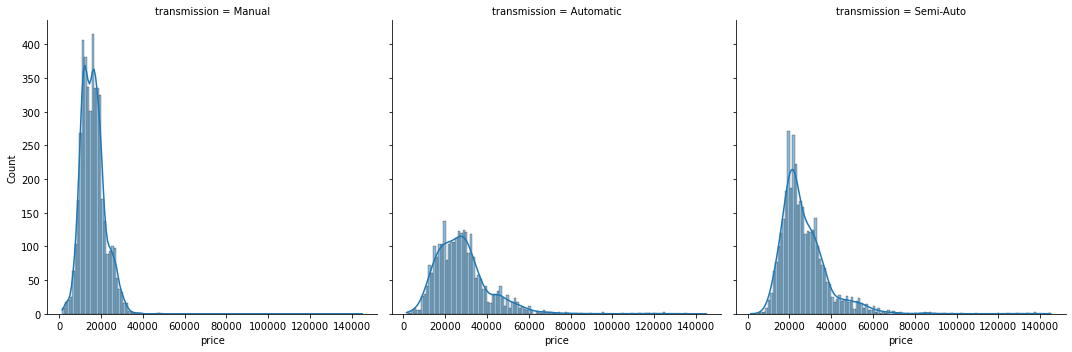

In [41]:
#distribution of price for each transmission type 
df=pd.concat(dataframes.values())
clean("",)
sns.displot(data=audi, x="price", col="transmission", kde=True)

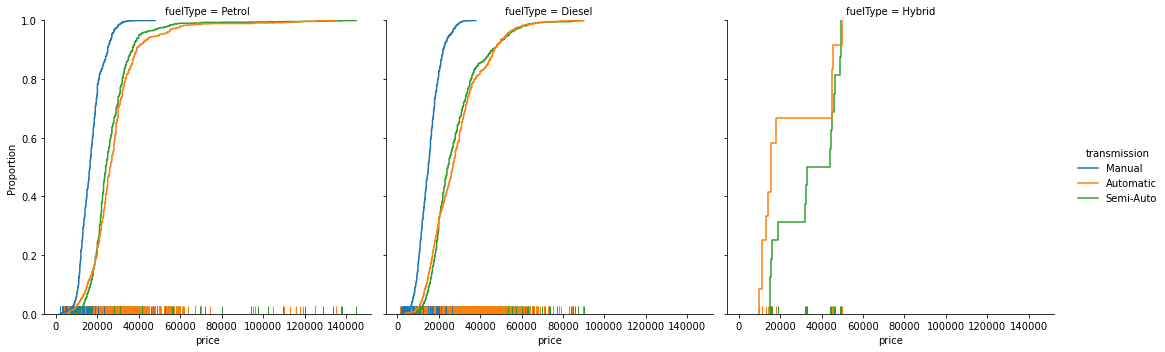

In [42]:
sns.displot(data=audi, kind="ecdf", x="price", col="fuelType", hue="transmission", rug=True)